<a href="https://colab.research.google.com/github/Mariana-MarquezA/Seattle-Weather/blob/main/Seattle_vs_St_Louis_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The objective of this notebook is to analyze the rainfall levels between Seattle and St. Louis and determine the city in which it rains more. The analysis will consist of numerical summaries and plots. 

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style='whitegrid')

## Data loading

In [ ]:
# Load clean data set
df =pd.read_csv('https://raw.githubusercontent.com/Mariana-MarquezA/Seattle-Weather/main/clean_seattle_stl_weather.csv')

# Numerical summaries

We can use `describe` to have a numerical of the data through a 5 number summary, count, mean and standard deviation. The next tables will describe the data collected from 2018 to 2022

In [ ]:
df.describe()

,precipitation,day_of_year,month,year
count,3652.000000,3652.000000,3652.000000,3652.00000
mean,0.121808,183.100219,6.523549,2020.00000
std,0.325431,105.438580,3.449005,1.41402
min,0.000000,1.000000,1.000000,2018.00000
25%,0.000000,92.000000,4.000000,2019.00000
50%,0.000000,183.000000,7.000000,2020.00000
75%,0.100000,274.000000,10.000000,2021.00000
max,8.640000,366.000000,12.000000,2022.00000


Since we want to make a comparison between Seattle and St. Louis, we want to look at the numerical summaries of precipitation grouped by city.

In [ ]:
df.groupby('city')['precipitation'].describe().T

city,SEA,STL
count,1826.000000,1826.000000
mean,0.113270,0.130345
std,0.240516,0.392268
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.010000,0.000000
75%,0.120000,0.050000
max,2.600000,8.640000


By looking at the table above, we can notice that the mean precipitation is almost the same in both cities. They differ by less than each of their own standard deviations. The distribution of rainfall in both cities is right-skewed. We can know this by looking at the quartiles. The maximum values do defer. In the data preparation notebook, we noticed an spike in the St. Louis data set, so we need to bare in mind that this maximum might be an outlier or an unusual occurance.

One way to compare rainfall between cities is by comparing the amount of rain each have.

In [ ]:
# Group by year and calculate the sum of precipitation
rain_amount = df.groupby(by=['year','city'])['precipitation'].sum().reset_index().rename(columns={'precipitation': 'rain_amount'})

In [ ]:
# Pivot the DataFrame
pivot_df2 = rain_amount.pivot_table(index='city', columns='year', values='rain_amount', aggfunc='sum').reset_index().round(2)


# Select only the numeric columns for sum calculation
numeric_columns = pivot_df2.columns.drop('city')
pivot_df2['total'] = pivot_df2[numeric_columns].sum(axis=1).round(2)

display(pivot_df2)


year,city,2018,2019,2020,2021,2022,total
0,SEA,37.24,38.65,43.22,44.43,43.28,206.82
1,STL,42.60,53.99,50.00,42.48,48.94,238.01


In the table above, we show the amount of rainfall between 2018-2022 and on each year. It is observable that in the overall 5-year period, St. Louis had more rainfall in terms of amount, measured in inches. Year by year, we can also see a trend of St. Louis having more rain with the exception of 2021. 

So far, we have approximated the question from an amount point of view; meaning that we have focused on the mean and the distribution of the amount of rainfall in inches. However, there is another way of thinking about the question which is to determine the rainy days that each city have.

In [ ]:
rainy_days_count = df[df['precipitation'] != 0].groupby(by=['city', 'year'])['precipitation'].count().reset_index().rename(columns={'precipitation': 'rainy_days_count'})

In [ ]:
# Pivot the DataFrame
pivot_df = rainy_days_count.pivot_table(index='city', columns='year', values='rainy_days_count', aggfunc='sum').reset_index()

# Select only the numeric columns for sum calculation
numeric_columns = pivot_df.columns.drop('city')
pivot_df['total'] = pivot_df[numeric_columns].sum(axis=1)

# Print the updated DataFrame
display(pivot_df)

year,city,2018,2019,2020,2021,2022,total
0,SEA,187,195,222,202,193,999
1,STL,117,135,120,117,109,598


The table above describes the number of rainy days that each city had over the whole period 2018-2022 and during each year. We can see that year by year, Seattle had more rainy days than Seattle.

# Plots

In the next section, we will use plots to further analyze our data. The advantage of plotting is that we can easily visualize more details of the data and understand its nuances. 

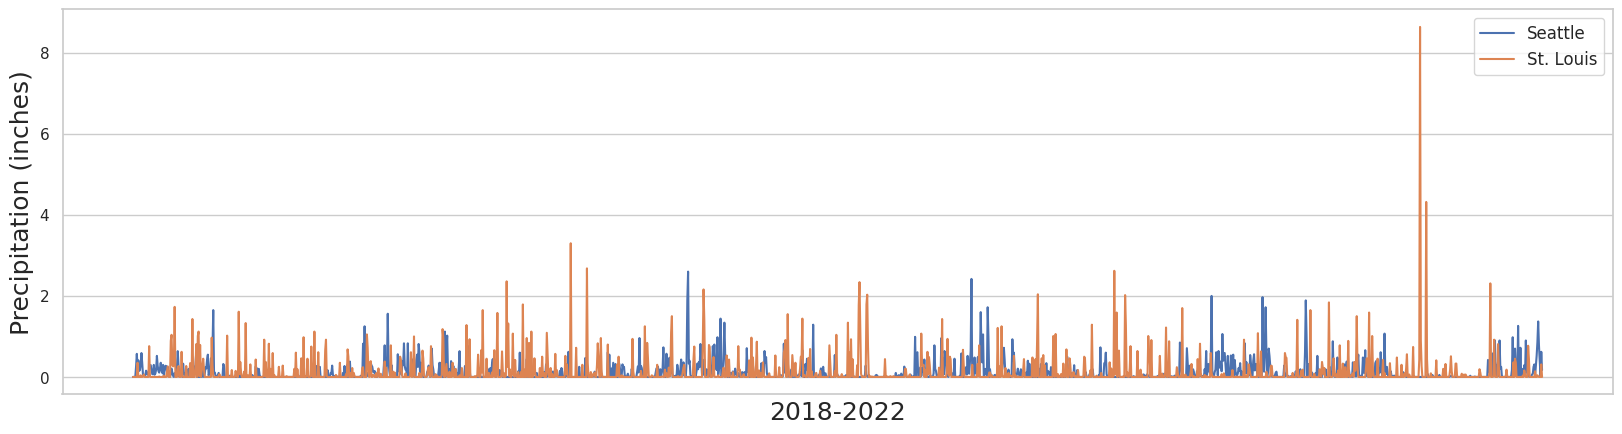

In [ ]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')
plt.xlabel('2018-2022', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

# Customize the hue legend box
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = ['Seattle', 'St. Louis']
legend_title = ''
plt.legend(handles, legend_labels, title=legend_title, fontsize=12)

plt.xticks([]) 

plt.show()


The plot above confirms our observation that in St. Louis there is a tendency of rainy days being torrencial. However, it is difficult to distinguish or count the number of rainy days in each city.

In order to further examine the usual amount of rainfall in each city, we will create boxplots that summarize the monthly mean precipitation over the period 2018-2022 and include the standard deviation.

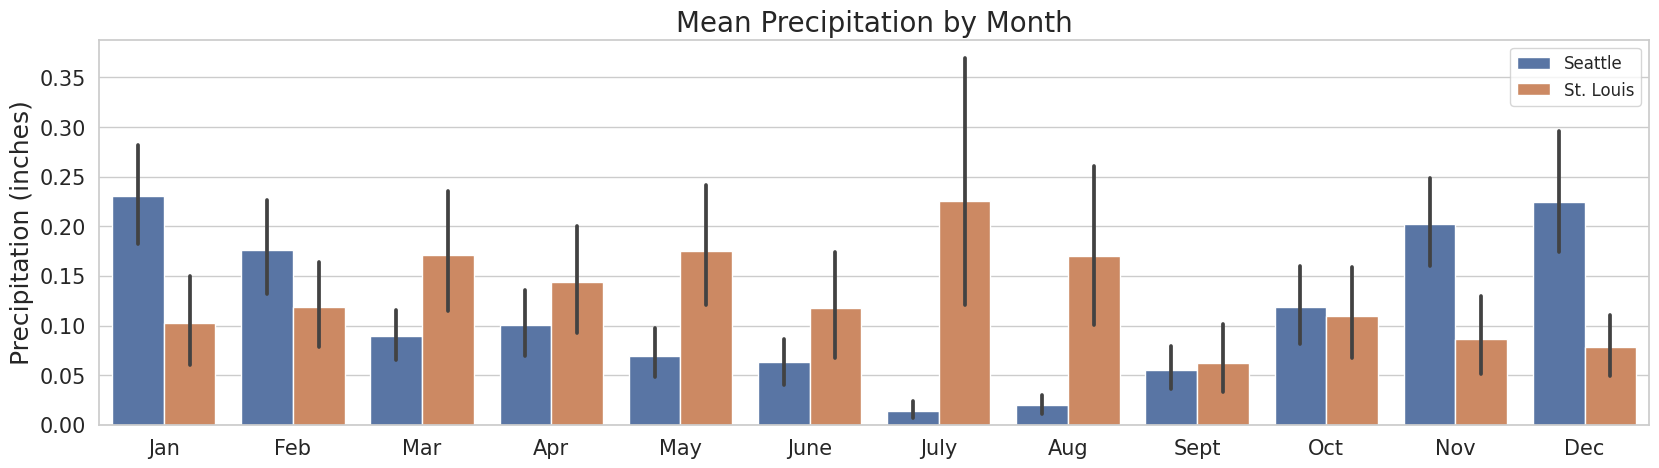

In [ ]:
plt.figure(figsize=(20, 5))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Mean Precipitation by Month', fontsize = 20)

plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tick_params(labelsize=15)

# Customize the hue legend box
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = ['Seattle', 'St. Louis']
legend_title = ''
plt.legend(handles, legend_labels, title=legend_title, fontsize=12)

plt.show()

What we can learn from this graph is that even though the overall quantity of precipitation tends to be higher in St. Louis, there are seasonal elements that affect the comparison. For instance, in November, December and January, it rains more, in terms of quantity, in Seattle. Remember that we should also consider the standard deviation. In these three months we can see that the difference is substantial as it is greater than the standard deviation from the Seattle and the St.Louis standard deviations. We can see that in February, there appears to be a transitional period. The mean quantity of rainfall is still greater in Seattle but the difference with St. Louis is within a standard deviation, which means that in a given year it is likely that it could rain more in St. Louis. The rest of the months show that St. Louis has higher mean precipitation. Points of interest are July and August because in those months the difference between the amount of rain is the largest. 

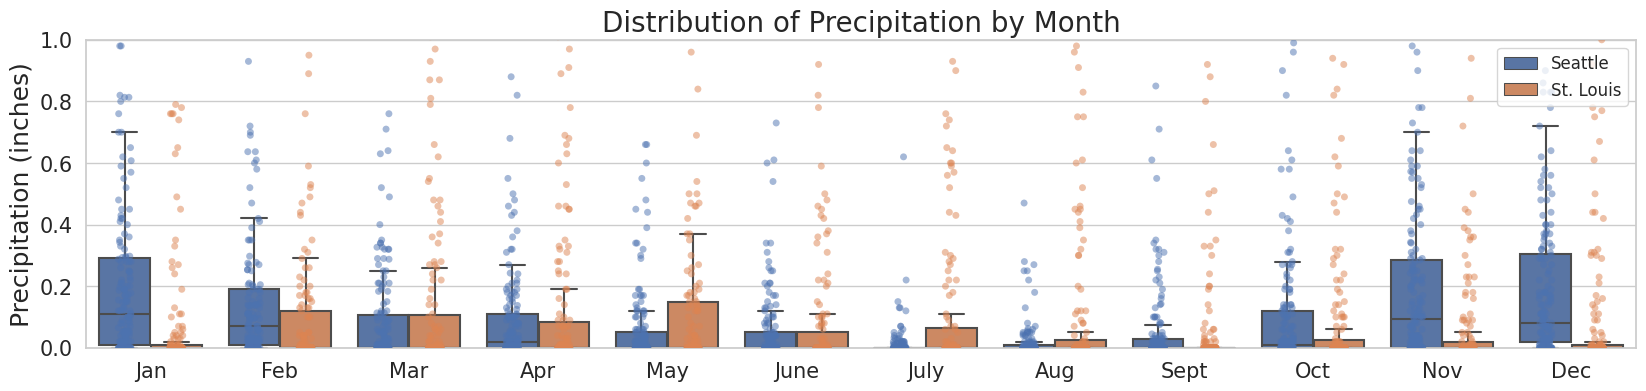

In [ ]:
plt.figure(figsize=(20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue='city', fliersize=0)
sns.stripplot(data = df, x = 'month', y = 'precipitation', hue='city', dodge=True, legend=False,alpha=0.5)

plt.xlabel('', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Distribution of Precipitation by Month', fontsize = 20)

plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tick_params(labelsize=15)

# Customize the hue legend box
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = ['Seattle','St. Louis']
legend_title = ''
plt.legend(handles, legend_labels, title=legend_title, fontsize=12,loc='upper right')

plt.ylim(0,1)

plt.show()

In this plot we can observe the distribution of monthly precipitation. As we suspected, our data is right-skewed. One important question to ask is which of the two cities has the most skewed data. The reason to ask this question is because it can give us an intuition of which city has more zeros or days without rain. 

In the plot above we can see that the boxplots corresponding to Seattle tend to be higher, which means Seattle has a flatter precipitation distribution than St. Louis. We can infer that St. Louis has a higher number of zeros or days without rain as its median tends to be lower.

In [ ]:
# Filter the DataFrame for rainy days
rainy_days_df = df[df['precipitation'] != 0]

# Count the rainy days per month and year
rainy_days_count = rainy_days_df.groupby(['city','year', 'month']).size().reset_index(name='rainy_days')
rainy_days_per_month_year = pd.DataFrame(rainy_days_count)


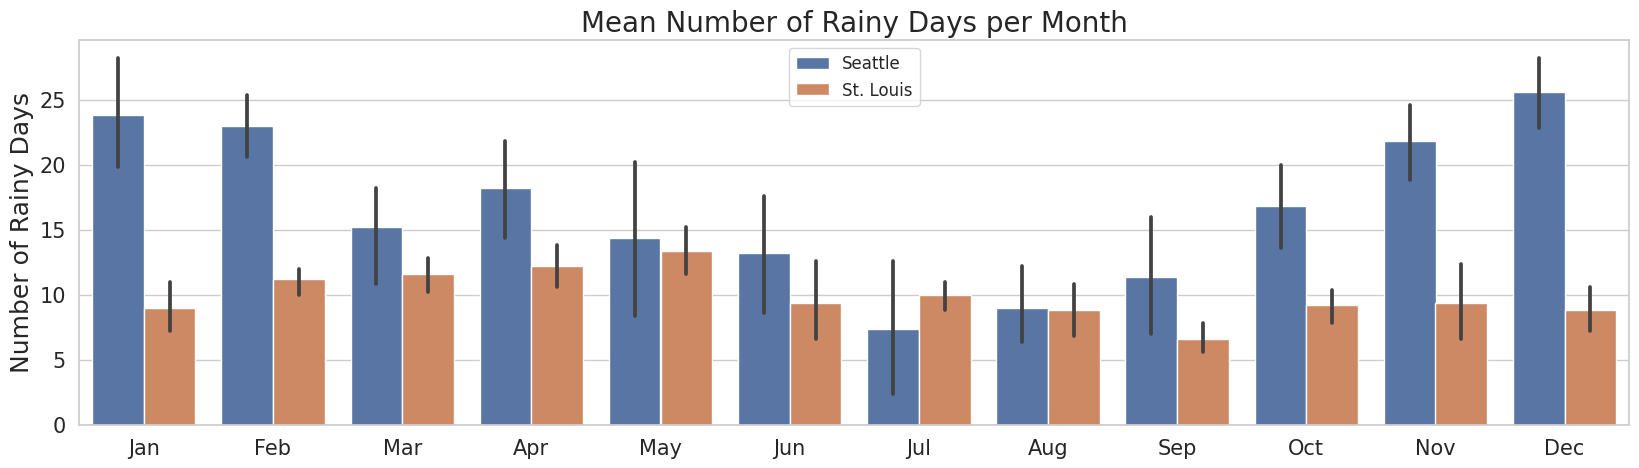

In [ ]:
plt.figure(figsize=(20, 5))

# Create the bar plot with mean values
sns.barplot(data=rainy_days_per_month_year, x='month', y='rainy_days', hue = 'city')

plt.xlabel('')
plt.ylabel('Number of Rainy Days', fontsize=18)
plt.title('Mean Number of Rainy Days per Month', fontsize=20)

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tick_params(labelsize=15)

plt.legend(title='', fontsize=12)

# Customize the hue legend box
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = ['Seattle','St. Louis']
legend_title = ''
plt.legend(handles, legend_labels, title=legend_title, fontsize=12,loc='upper center')

plt.show()


To verify our inference of St. Louis having less rainy days, we can plot the mean of rainy days per month. We can see that in most months Seattle has a higher mean of rainy days, the only exception being July. Once again, we need to consider the standard deviations because for Seattle, the standard deviation in July is quite big. It means that there are years in which July actually has the same or more rainy days than St. Louis. 

Here we can also see a seasonal trend. Starting in September, the number of rainy days in Seattle increases. It peaks in December and reaches parity with St. Louis around May and June.

To determine what classifies as heavy or light rain, historical and geographical data are usually taken into account. According to the [Environmental Protection Agency](https://www.epa.gov/climate-indicators/climate-change-indicators-heavy-precipitation): 
"Heavy precipitation refers to instances during which the amount of rain or snow experienced in a location substantially exceeds what is normal. What constitutes a period of heavy precipitation varies according to location and season." 

In order to identify heavy rain days, an outlier aproach was used here. We used a function to identify the outliers and created a bar plot to visualize the mean of heavy rain days and standard deviation.

In [ ]:
grouped = df.groupby(['city', 'year','month'])

# Define a function to calculate the outliers for a given group
def get_outliers(group):
    q1 = group['precipitation'].quantile(0.25)
    q3 = group['precipitation'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['precipitation'] < lower_bound) | (group['precipitation'] > upper_bound)]
    top_outliers = outliers[outliers['precipitation'] > q3]
    lower_outliers = outliers[outliers['precipitation'] < q1]
    return pd.DataFrame({
        'city': group['city'].iloc[0],
        'year': group['year'].iloc[0],
        'month': group['month'].iloc[0],
        'outlier_count': [len(outliers)],
        'top_outlier_count': [len(top_outliers)],
        'lower_outlier_count': [len(lower_outliers)]
    })

In [ ]:
# Apply the function to each city group
outliers_df = grouped.apply(get_outliers).reset_index(drop=True)

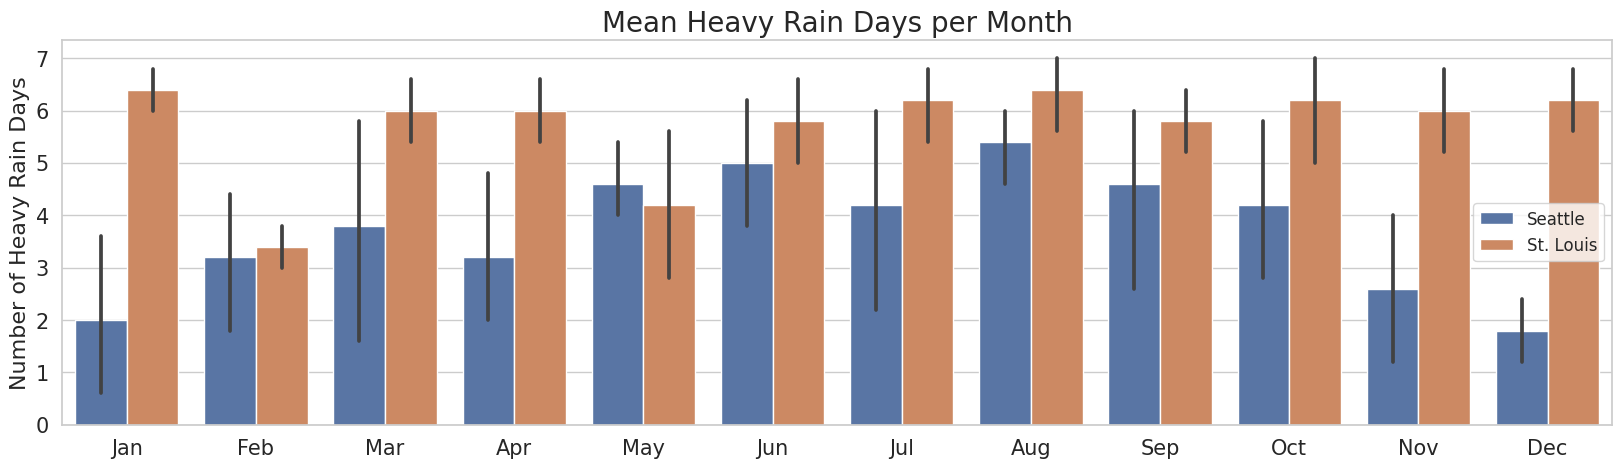

In [ ]:
plt.figure(figsize=(20, 5))

sns.barplot(data=outliers_df, x='month', y='top_outlier_count', hue='city')

plt.xlabel('')
plt.ylabel('Number of Heavy Rain Days', fontsize=16)
plt.title('Mean Heavy Rain Days per Month', fontsize=20)

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tick_params(labelsize=15)

# Customize the hue legend box
handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = ['Seattle','St. Louis']
legend_title = ''
plt.legend(handles, legend_labels, title=legend_title, fontsize=12,loc='right')

plt.show()


We can see that from November to January, St. Louis has significantly more heavy precipitation days. In most of the other months St. Louis had a higher mean of heavy rain days. One thing to notice is that the standard deviations of St. Louis are smaller than the ones of Seattle. This means that in Seattle there is more variatiation and less certainty of the number of heavy rain days that there will be in a given month and year.